In [138]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# EXERCISE 1. 
What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by

Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees. 

Give a 99% confidence interval for the average body temperature of healthy people.

In [139]:
n = 130 # sample size 
xbar = 98.25 # mean of sample 
sigma  = 0.73 # standard deviation of sample 

In [140]:
sem = sigma / np.sqrt(n)
sem

0.06402523540941313

In [141]:
convidence_interval = stats.norm.interval(confidence = 0.99, loc = xbar, scale = sem)
convidence_interval

(98.08508192246582, 98.41491807753418)

 **result** : % 99 güvenirlikle 130 sağlıklı kişinin vucut sıcaklığı (98.08508192246582, 98.41491807753418) bu aralıktadır.

# EXERCISE 2.
The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of  

patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and 

standard deviation equal to 5.4 and 3.1 days, respectively.

Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.

In [142]:
n = 500 
sigma = 3.1
xbar = 5.4

In [143]:
sem = sigma / np.sqrt(n)
sem

0.13863621460498696

In [144]:
convidence_interval = stats.norm.interval(confidence= 0.95 ,loc = xbar, scale = sigma )
convidence_interval

(-0.6758883520741676, 11.475888352074168)

**result** = 25 ve 34 yaş aralığında hastaların hastanede yatarak tedavi olma günleri % 95 güvenirliğe göre (-0.6758883520741676, 11.475888352074168) bu aralıktadır.

# EXERCISE 3. 
The hourly wages in a particular industry are normally distributed with mean 13.20 dolar and standard deviation $2.50. A company 

in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying 

substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [145]:
# h0 : mu0 = 13.20, sigma = 2.50
# h1 : mu1 = 12.20
alpha = 0.01
mu0 = 13.20
xbar = 12.20
sigma = 2.50
n = 40
z = (xbar - mu0) / (sigma / np.sqrt(n))
z

-2.5298221281347035

In [146]:
p_value = stats.norm.cdf(z)
p_value

0.005706018193000826

In [147]:
if p_value > alpha :
    print("Bu şirket ödeme yapmakla şuclanmaz ")
else :
    print("bu şirket ödeme yapmakla şuçlanır")

bu şirket ödeme yapmakla şuçlanır


# EXERCISE 4.
Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the 

following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear 

strength, at the 1% significance level? 

In [148]:
soil1 = [1.442,1.943,1.11,1.912,1.553,1.641,1.499,1.347,1.685,1.578,1.866,1.653,1.665,1.64,
         1.976,1.754,1.589,1.976,1.863,1.932,1.57,1.613,2.054,1.55,1.714,1.896,1.737,1.74,1.708,1.54]


soil2 = [1.364,1.878,1.337,1.828,1.371,1.428,1.119,1.373,1.589,1.714,1.26,1.492,1.395,1.778,1.611,1.202,1.542,1.094,1.557,
         1.053,1.183,1.367,1.144,1.151,1.561,1.192,1.489,1.379,1.501,1.277,1.593,1.172,1.51,1.74,1.355]

alpha = 0.005 

In [149]:
len(soil1)

30

In [150]:
len(soil2)

35

In [151]:
leveneTest = stats.levene(soil1, soil2)
leveneTest 
# p_value alpha dan daha büyük olduğu için equal_var = True olur.

LeveneResult(statistic=0.30588570937544846, pvalue=0.5821732603362084)

In [152]:
np.mean(soil1)

1.6915333333333333

In [153]:
np.mean(soil2)

1.4171142857142855

In [154]:
# H0 : mu1 = mu2 
# h1 : mu1 != mu2 

In [155]:
indTest = stats.ttest_ind(soil1, soil2 ,equal_var = True)
indTest

Ttest_indResult(statistic=5.161009752530635, pvalue=2.6636206946132346e-06)

In [156]:
# Decision
alpha = 0.05

if indTest.pvalue < alpha:
    print(" H0 hipotezini reject ederiz")
else:
    print(" H0 hipotezini reject edemeyiz")

 H0 hipotezini reject ederiz


# EXERCISE 5. 
The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

   Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
   
   Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.


In [157]:
df = pd.read_csv("2015 PISA Test - Sheet1.csv")
df.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [158]:
df.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', nan, 'AF'], dtype=object)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            70 non-null     object 
 1   Continent_Code          65 non-null     object 
 2   internet_users_per_100  70 non-null     float64
 3   Math                    70 non-null     float64
 4   Reading                 70 non-null     float64
 5   Science                 70 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


In [160]:
df.describe(include = "object").T

,count,unique,top,freq
Country Code,70,70,ALB,1
Continent_Code,65,5,EU,37


In [161]:
df.shape

(70, 6)

In [162]:
df.isnull().sum()

Country Code              0
Continent_Code            5
internet_users_per_100    0
Math                      0
Reading                   0
Science                   0
dtype: int64

In [163]:
df.dropna(inplace = True)

In [164]:
df.isnull().sum()

Country Code              0
Continent_Code            0
internet_users_per_100    0
Math                      0
Reading                   0
Science                   0
dtype: int64

In [165]:
df.shape

(65, 6)

In [166]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_users_per_100,65.0,72.364354,16.570118,21.976068,63.306625,73.0987,85.0529,98.2000
Math,65.0,463.796218,51.293822,359.606200,417.991900,478.6448,501.7298,564.1897
Reading,65.0,462.118551,48.443166,346.549000,427.141000,481.4391,499.8146,535.1002
Science,65.0,467.535888,45.762751,375.745100,427.997800,475.4089,502.5751,555.5747


In [167]:
# H0 : mu1 = mu2  (Asya ülkelerin ve Avrupa ülkelerin matematik ortalaması birbirine eşit )
# H1 : mu1 != mu2  (alernatif hipotezimiz bu iki ülkenin matematik ortalamasının birbirine eşit degil)

In [168]:
df_as = df[df.Continent_Code == "AS"]["Math"]
df_as

1     427.4827
11    531.2961
25    403.8332
27    547.9310
30    386.1096
33    469.6695
35    380.2590
36    532.4399
37    459.8160
38    524.1062
39    396.2497
43    543.8078
49    446.1098
56    402.4007
59    564.1897
63    415.4638
69    494.5183
Name: Math, dtype: float64

In [169]:
df_eu = df[df.Continent_Code == "EU"]["Math"]
df_eu

0     413.1570
4     496.7423
5     506.9844
6     441.1899
9     521.2506
14    437.1443
15    492.3254
16    505.9713
17    511.0876
20    485.8432
21    519.5291
22    511.0769
23    492.9204
24    492.4785
26    453.6299
28    464.0401
29    476.8309
31    503.7220
32    488.0332
34    489.7287
40    478.3834
41    485.7706
42    482.3051
44    419.6635
46    371.3114
47    478.6448
48    417.9341
50    512.2528
51    501.7298
54    504.4693
55    491.6270
57    443.9543
58    494.0600
60    475.2301
61    509.9196
62    493.9181
66    420.4540
Name: Math, dtype: float64

In [170]:
leveneTest = stats.levene(df_as, df_eu)
leveneTest

LeveneResult(statistic=14.300030628780675, pvalue=0.0004037413184451079)

In [171]:
indTest = stats.ttest_ind(df_as, df_eu, equal_var = False)
indTest

Ttest_indResult(statistic=-0.7068451468277998, pvalue=0.48761436901117416)

In [172]:
alpha = 0.05

if indTest.pvalue < alpha:
    print("H0 hipotezini reject ederiz.")
else :
    print("H0 hipotezini reject edemeyiz.")

H0 hipotezini reject edemeyiz.


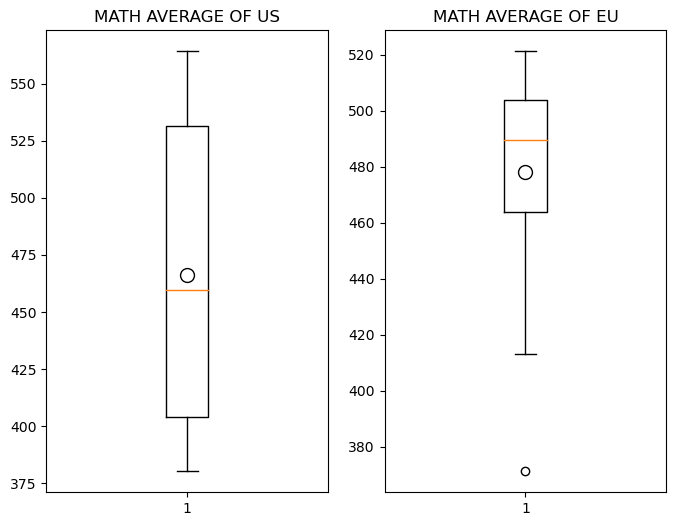

In [173]:
plt.figure(figsize = (8,6))
plt.subplot(1,2,1)
plt.boxplot(df_as,showmeans =True,  meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.title("MATH AVERAGE OF US")
plt.subplot(1,2,2)
plt.boxplot(df_eu, showmeans = True,  meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
plt.title("MATH AVERAGE OF EU")
plt.show()